<a href="https://colab.research.google.com/github/NihilisticMotif/CheCheConjecture/blob/main/Algorithm/Sorting_with_Proof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

The goal of this documentation is to write the prove the basic sorting algorithm, including
1. Insertion Sort
2. Binary Insertion Sort
3. Merge Sort
4. Quick Sort

##Loop Invariants

Loop Invariant means the condition that holds for every iteration of the loop.

Example
* In `MergeSort`, `Merge(ls0, ls1)` always return sorted output array `ls`, if `ls0` and `ls1` are both sorted array.
* In `Pivot` of `QuickSort`, `prev <= next - 1`
* In `BinarySearch`, `high - low` is decrease in each while loop

Reference
* https://stackoverflow.com/questions/3221577/what-is-a-loop-invariant

##How to prove the algorithm ?

In order to prove the algorithm it is necessary to prove that the algorithm that
1. The algorithm is terminated using the time complexity of the given algorithm
2. The algorithm is working correctly for small input (proving the base case and loop invariants)
3. The algorithm is working correctly for the larger input (we can prove this by applying the base case)

Reference
* https://cs.stackexchange.com/questions/43771/how-can-i-prove-algorithm-correctness
* https://stackoverflow.com/questions/1952070/writing-a-proof-for-an-algorithm

##Meaning of Stable in Sorting Algorithm

A sorting algorithm is said to be stable if two objects with equal keys appear in the same order in sorted output as they appear in the input array to be sorted. Some sorting algorithms are stable by nature like Insertion sort, Merge Sort, Bubble Sort, etc. And some sorting algorithms are not, like Heap Sort, Quick Sort, etc.

The stable sorting algorithm is useful when the user want to preserve the order of the element in lists, such as the order of book names by characters etc.

Reference
* https://stackoverflow.com/questions/1517793/what-is-stability-in-sorting-algorithms-and-why-is-it-important

#Import Library

In [ ]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

#Binary Search

##Implementation

In [ ]:
def BinarySearch(ls,element):
  # Time : O(log(n))
  # Space: O(1)
  low = 0
  high = len(ls)
  while low < high:
    mid = math.floor((low + high)/2)
    if element == ls[mid]:
      return mid
    elif element < ls[mid]:
      high = mid - 1
    else:
      low = mid + 1
  if low < len(ls):
    if element == ls[low]:
      return low
    else:
      return None
  return None

##Test

In [ ]:
ls = list(set((10*np.random.normal(0,1,10)).astype(np.int64)))
ls.sort()
print(ls)
print('First Test')
for i in range(len(ls)):
  if ls[BinarySearch(ls,ls[i])]==ls[i]:
    print(i,True)
  else:
    print(i,False)
print()
print('Second Test')
for i in range(len(ls)):
  lss = ls[:i+1]
  if lss[BinarySearch(lss,ls[i])]==ls[i]:
    print(i,True)
  else:
    print(i,False)
print()
print('Third Test')
for i in range(len(ls)):
  lss = ls[:i+1]
  if BinarySearch(lss,ls[i]+1) == None:
    print(i,True)

[-15, -11, -8, -6, 0, 4, 6, 16, 17]
First Test
0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True

Second Test
0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True

Third Test
0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True


##Proof

The purpose of Binary Search is to search the index of the element in sorted list.

###Complexity Evaluation

Consider the following algorithm

```
def BinaryWhileH(num):
  low = 0
  high = num
  while low < high:
    print()
    print('high',high)
    print('low ',low)
    high = math.floor((low + high)/2) - 1
```

If `low < high` $\implies$ `high` in each while loop is decrease by approximately half $\implies$ This code is terminated using $O(\log_2(n))$ times and $O(1)$ space.

If `low >= high` $\implies$ This code is terminated immediately.

```
def BinaryWhileL(num):
  low = 0
  high = num
  while low < high:
    print()
    print('high',high)
    print('low ',low)
    low = math.floor((low + high)/2) + 1
```

On the other hands, given that `low < high` $\implies$ The different between `low` and `high` is decrease by approximately half plus $1$ $\implies$ This code is terminated using $O(\log_2(n))$ times and $O(1)$ space

The reason to add `low += 1` or `high -= 1` is because to guarantee that `low >= high` within the finite loop.

In the `while low < high` loop of `BinarySearch` there is only 1 in 3 scenarios is possible in each while loop
1. `return mid` and the loop is terminated
1. `high = mid - 1`
3. `low = mid + 1`

Therefore the complexity of this algorithm is
* Time: $O(\log_2(n))$
* Space: $O(1)$

In [ ]:
def BinaryWhileH(num):
  low = 0
  high = num
  while low < high:
    print()
    print('high',high)
    print('low ',low)
    high = math.floor((low + high)/2) - 1
  print()
  print('high',high)

BinaryWhileH(2**10)


high 1024
low  0

high 511
low  0

high 254
low  0

high 126
low  0

high 62
low  0

high 30
low  0

high 14
low  0

high 6
low  0

high 2
low  0

high 0


In [ ]:
def BinaryWhileL(num):
  low = 0
  high = num
  while low < high:
    print()
    print('high',high)
    print('low ',low)
    low = math.floor((low + high)/2) + 1
  print()
  print('low',low)

BinaryWhileL(2**10)


high 1024
low  0

high 1024
low  513

high 1024
low  769

high 1024
low  897

high 1024
low  961

high 1024
low  993

high 1024
low  1009

high 1024
low  1017

high 1024
low  1021

high 1024
low  1023

low 1024


###Base Case

Consider the following code

```
def BinarySearch(ls,element):
  # Time : O(log(n))
  # Space: O(1)
  low = 0
  high = len(ls)
  while low < high:
    mid = math.floor((low + high)/2)
    if element == ls[mid]:
      return mid
    elif element < ls[mid]:
      high = mid - 1
    else:
      low = mid + 1
  if low < len(ls):
    if element == ls[low]:
      return low
    else:
      return None
  return None
```

Base case when `ls = []`
* `len(ls) == 0` $\implies$ `ls` is sorted list
* `len(ls) == 0` $\implies$ `low == high`
* `ls == []` $\implies$ `BinarySearch([],element) == None`

Base case when `ls = [a]`

First while loop
* `low = 0`
* `high = 1`
* `mid == 0`
* `element == ls[0]` $\implies$ `BinarySearch([],element) == 0`

Second while loop
* `element < ls[mid]` $\implies$ `high = 0 == low`
* `element > ls[mid]` $\implies$ `low = 1 == high`
* `element != ls[0]` $\implies$ `BinarySearch([],element) == None`
* `low == 1` $\implies$ `BinarySearch([],element) == None`

###General Case

####Initializing the Variable

Define Input
* `ls = [a0,...,an]` where `ls` is sorted list.

Define Variable
* `low = 0 `
* `high = len(ls)`

####While Loop

The while loop is executed.
* `while low < high:`

In each loop, `mid` is initialized, such that
* `mid = math.floor((low + high)/2)`

Then
* `element == ls[mid]` $\implies$ `BinarySearch(ls,element) == mid` and the while loop is terminated.
* `element < ls[mid]` $\implies$ `high = mid - 1`
* `element > ls[mid]` $\implies$ `low = mid + 1`

`low >= high` $\implies$ while loop is terminated then the following statement is checked
* `if element == ls[low]: return low`
* `else: return None`

####Correctness

Because `ls` is sorted list implies that
* `element < ls[mid]` $\implies$ `element not in ls` or `exists i < mid : element == ls[i]`
* `element > ls[mid]` $\implies$ `element not in ls` or `exists i > mid : element == ls[i]`
* `element not in ls` $\implies$ the while loop terminated in $O(\log_2(n))$ time and `BinarySearch(ls,element) == None`

Therefore this algorithm return correct index of element `element` in sorted list `ls`.

####Note

Do not implementing any algorithm, including `BinarySearch` using recursive manner without necessary reason to do so, because recursive algorithm use stack memory to store recursive call, which make the space complexity greater than $O(1)$.
* https://www.geeksforgeeks.org/g-fact-86/

```
def RecursiveFunction(...):
  ...
  RecursiveFunction(...)
  # This is bad practice.

```

####Reference
* https://www.geeksforgeeks.org/binary-search/



#Insertion Sort

##Implementation

In [ ]:
def InsertionSort(ls):
  # Time : O(n^2)
  # Space: O(1)
  # https://youtu.be/8mJ-OhcfpYg?si=FV7_eZoM8PbfwpZM
  for current in range(len(ls)):
    prev = current - 1
    while prev >= 0:
      if ls[current] < ls[prev]:
        temp = ls[prev]
        ls[prev] = ls[current]
        ls[current] = temp
        current = prev
      prev -= 1

##Test

In [ ]:
ls = list((10*np.random.normal(0,1,6)).astype(np.int64))
print(ls)
InsertionSort(ls)
print(ls)

[0, 4, -8, 5, -3, 10]
[-8, -3, 0, 4, 5, 10]


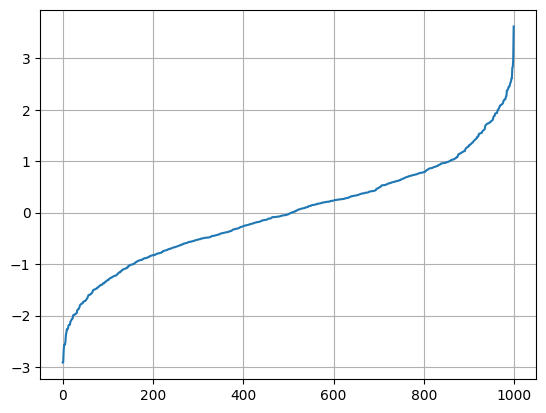

In [ ]:
ls0 = list(np.random.normal(0,1,1000))
InsertionSort(ls0)
ls0=np.array(ls0)
plt.plot(np.arange(1000),ls0)
plt.grid()

In [ ]:
np.all(ls0[:-1] <= ls0[1:])

True

##StabilityTest

In [ ]:
def InsertionSort(ls,index=0):
  # Time : O(n^2)
  # Space: O(1)
  # https://youtu.be/8mJ-OhcfpYg?si=FV7_eZoM8PbfwpZM
  for current in range(len(ls)):
    prev = current - 1
    while prev >= 0:
      if ls[current][index] < ls[prev][index]:
        temp = ls[prev]
        ls[prev] = ls[current]
        ls[current] = temp
        current = prev
      prev -= 1

In [ ]:
# The code is implementing by ChatGPT.
def TestStability(sorting_algorithm):
    original_list = []
    ls0 = [7,7, 5, -6, 1, 5, 2,5,3] # [1,3,2,4,3,3,2,3,1,1]
    ls1 = [2.718,15, 2.14, 1, -12, 34, 14,7,34] # [1,1,2,4,2,3,2,4,1,1]
    for i0,i1 in zip(ls0,ls1):
      original_list.append((i0,i1))

    sorted_list = original_list.copy()
    sorting_algorithm(sorted_list)

    print("Original list:")
    print(original_list)
    print("Sorted list by Value A:")
    print(sorted_list)


In [ ]:
TestStability(InsertionSort)

Original list:
[(7, 2.718), (7, 15), (5, 2.14), (-6, 1), (1, -12), (5, 34), (2, 14), (5, 7), (3, 34)]
Sorted list by Value A:
[(-6, 1), (1, -12), (2, 14), (3, 34), (5, 2.14), (5, 34), (5, 7), (7, 2.718), (7, 15)]


##Proof

```
def InsertionSort(ls):
  # Time : O(n^2)
  # Space: O(1)
  # https://youtu.be/8mJ-OhcfpYg?si=FV7_eZoM8PbfwpZM
  for current in range(len(ls)):
    prev = current - 1
    while prev >= 0:
      if ls[current] < ls[prev]:
        temp = ls[prev]
        ls[prev] = ls[current]
        ls[current] = temp
        current = prev
      prev -= 1
```


###Complexity Evaluation

Define
* `ls = [a0, ..., an]`

Time Complexity Evaluation
1. `for current in range(len(ls)):` takes `len(ls)` time ($O(n)$ time)
1. `prev` is initialized, such that `prev = current - 1` in each loop.
2. `while prev >= 0` will be terminated in `current` time ($O(n)$ time) because `prev -= 1` in every loop.
4. Therefore the time complexity of this algorithm is $O(n^2)$

Space Complexity Evaluation
1. `temp = ls[prev]` is used as temporary space.
2. `ls[prev] = ls[current]`
3. `ls[current] = temp`
4. `current = prev` for checking if other previous number is greater than other next number.
5. The space complexity of this algorithm is $O(1)$

The Complexity of this algorithm is
* Time: $O(n^2)$
* Space: $O(1)$


###Base Case

Base case when `ls == []`
* `[]` is sorted list.
* `for current in range([])` is never executed and not produce error.

Base case when `ls == [a]`
* `[a]` is sorted list.
* `prev == -1 < 0` $\implies$ while loop is not executed.

Base case when `ls == [a,b]`
* `[a,b]` is or is not sorted list
* `prev == 0 - 1 < 0` $\implies$ the while loop is not executed.
* `prev == 1 - 1 == 0` $\implies$ the while loop is executed only 1 time.
* `if ls[1] < ls[0]:` the positions of `ls[1]` and `ls[0]` such that `ls` is sorted list

Base case when `ls == [a,b,c]`

Second Loop
* `[a,b]` is or is not sorted list
* `prev == 1 - 1 == 0` $\implies$ the while loop is executed only 1 time.
* `if ls[1] < ls[0]:` the positions of `ls[1]` and `ls[0]` such that `ls` is sorted list

Third Loop
* `[a,b,c]` is or is not sorted list
* `prev == 2 - 1 == 1 > 0` $\implies$ the while loop is executed only 2 times.
* `b <= c` and `a > c` is always `False` because `[a, b]` is sorted list after the Second Loop.
* `b <= c` and `a <= c` $\implies$ `ls` is not updated
* `b > c` and `a <= c` $\implies$ The positions of `ls[2]` and `ls[1]` are swapped.


###General Case

Suppose that
* `ls[:current]` is sorted list

Then
* `prev = current - 1`
* The while loop is executed.
* `prev -= 1` in each while loop.

If `ls[current] < ls[prev]`
* The positions of `ls[current]` and `ls[prev]` are swapped.

Implies that
* `ls[:prev]` is sorted list.
* `exists i in [0, ..., prev - 1] : ls[i] > ls[prev]` $\implies$ `ls[:current]` is or is not sorted list.
* `forall i in [prev, ..., current - 1] : ls[i] <= ls[i + 1]`

Then `current` and `prev` are updated, such that
* `current = prev`
* `prev -= 1`

If `prev >= 0` $\implies$ the while loop repeats until `prev < 0`

If `prev < 0` $\implies$ the while loop stop
* `forall i in [0, ..., current - 1] : ls[i] <= ls[i + 1]` $\implies$ `ls[:current + 1]` is sorted list

Therefore `InsertionSort` sort `ls` correctly.



###Is `InsertionSort` stable ?

Given that
* `ls[:current]` is sorted list
* `forall i in [0, ..., current - 2]: ls[i] <= ls[i + 1]`

Implies that
* `forall a < b < c : ( ls[b] == ls[c] and ls[a] > ls[c] ) is False`
* `forall i in [0, ..., current - 1] : ls[i] <= ls[current]` $\implies$ The original position of the duplicate value elements in the list is preserved.

Therefore `InsertionSort` is stable.





#Binary Insertion Sort

##Implementation


In [ ]:
def BinarySearch(ls,element,high):
  # Time : O(log(n))
  # Space: O(1)
  low = 0
  while low <= high:
    mid = math.floor((high + low)/2)
    if element < ls[mid]:
      high = mid - 1
    else:
      low = mid + 1
  return low

def InsertionSort(ls):
  # Time : O(n^2)
  # Space: O(1)
  # https://youtu.be/8mJ-OhcfpYg?si=FV7_eZoM8PbfwpZM
  for current in range(1,len(ls)):
    select = BinarySearch(ls,ls[current],current)
    temp = ls[current]
    prev = current - 1
    while prev >= select:
      ls[prev + 1] = ls[prev]
      prev -= 1
    ls[prev + 1] = temp

# https://www.geeksforgeeks.org/binary-insertion-sort/

##Test

In [ ]:
ls = list((10*np.random.normal(0,1,6)).astype(np.int64))
print(ls,'\n')
InsertionSort(ls)
print(ls)

[-1, 5, 6, -21, 0, 27] 

select 2
select 3
select 4
select 5
select 6
[-1, 5, 5, 5, 5, 5]


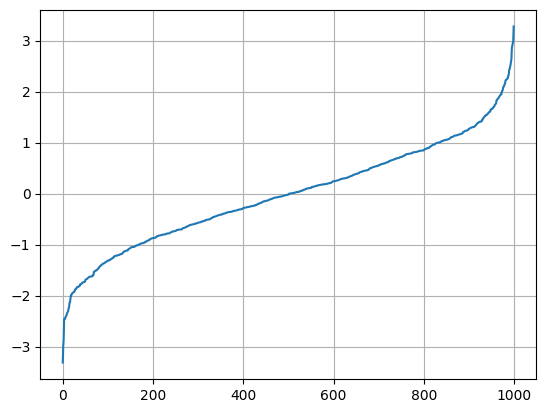

In [ ]:
ls0 = list(np.random.normal(0,1,1000))
InsertionSort(ls0)
ls0=np.array(ls0)
plt.plot(np.arange(1000),ls0)
plt.grid()

In [ ]:
np.all(ls0[:-1] <= ls0[1:])

True

##StabilityTest

In [ ]:
def BinarySearch(ls,element,high,index=0):
  # Time : O(log(n))
  # Space: O(1)
  low = 0
  while low <= high:
    mid = math.floor((high + low)/2)
    if element[index] < ls[mid][index]:
      high = mid - 1
    else:
      low = mid + 1
  return low

def InsertionSort(ls,index=0):
  # Time : O(n^2)
  # Space: O(1)
  # https://youtu.be/8mJ-OhcfpYg?si=FV7_eZoM8PbfwpZM
  for current in range(1,len(ls)):
    select = BinarySearch(ls,ls[current],current,index)
    temp = ls[current]
    prev = current - 1
    while prev >= select:
      ls[prev + 1] = ls[prev]
      prev -= 1
    ls[prev + 1] = temp

In [ ]:
# The code is implementing by ChatGPT.
def TestStability(sorting_algorithm):
    original_list = []
    ls0 = [7    ,  7,    5, -6,   1,  5,   5,  2, 5,  3] # [1,3,2,4,3,3,2,3,1,1]
    ls1 = [2.718, 15, 2.14,  1, -12, 34, 404, 14, 7, 34] # [1,1,2,4,2,3,2,4,1,1]
    for i0,i1 in zip(ls0,ls1):
      original_list.append((i0,i1))

    sorted_list = original_list.copy()
    sorting_algorithm(sorted_list)

    print("Original list:")
    print(original_list)
    print("Sorted list by Value A:")
    print(sorted_list)


In [ ]:
TestStability(InsertionSort)

Original list:
[(7, 2.718), (7, 15), (5, 2.14), (-6, 1), (1, -12), (5, 34), (5, 404), (2, 14), (5, 7), (3, 34)]
Sorted list by Value A:
[(-6, 1), (1, -12), (2, 14), (3, 34), (5, 2.14), (5, 34), (5, 404), (5, 7), (7, 2.718), (7, 15)]


##Proof

###Part 1 : Why `BinarySearch return low` ?

```
def BinarySearch(ls,element,high):
  # Time : O(log(n))
  # Space: O(1)
  low = 0
  while low <= high:
    mid = math.floor((high + low)/2)
    if element < ls[mid]:
      high = mid - 1
    else:
      low = mid + 1
  return low
```

Everytime that the while loop is operated there is only 1 in 2 possibilities that
1. `low = mid + 1`
2. `high = mid - 1`

Implies that the different between `high` and `low` is decrease approximately half.

The `BinarySearch` use $O(1)$ space and $O(\log_2(n))$ time to finish the loop and `return low`.

When `low == high` the `BinarySearch` still continue the last while loop then `return low` in order to determine the position of `element` in `ls`, such that
* `element < ls[low] : return low`
* `element >= ls[low] : return low + 1`

The reason is that `return low` are
1. There might be the case where `high = -1` which make `InsertionSort` swap the value of `ls[0]` and `ls[-1]` incorrectly in the next while loop.
2. In case `high == low` and `element == ls[low]` then `return low + 1` help preserve the original position of duplicate value element in `ls` which make the `InsertionSort` sort `ls` in a stable manner.

###Part 2 : Correctness of `InsertionSort`

```
def InsertionSort(ls,index=0):
  # Time : O(n^2)
  # Space: O(1)
  # https://youtu.be/8mJ-OhcfpYg?si=FV7_eZoM8PbfwpZM
  for current in range(1,len(ls)):
    select = BinarySearch(ls,ls[current],current,index)
    temp = ls[current]
    prev = current - 1
    while prev >= select:
      ls[prev + 1] = ls[prev]
      prev -= 1
    ls[prev + 1] = temp
```

###Complexity

The time complexity of this algorithm is $O(n^2)$ because both for loop and nested while loop use $O(n)$ time. However the `InsertionSort` with `BinarySearch` is faster than `InsertionSort` without `BinarySearch` because if
* `forall i in [0, ..., current - 1] : ls[i] <= ls[current]`

The `InsertionSort` with `BinarySearch` can skips the while loop, due to the fact that
* `prev < current <= select`

The complexity of this algorithm is
* Time : $O(n^2)$
* Space: $O(1)$

###Base Case : `current == 1`

* `prev = 0`
* `temp = ls[1]`
* `element = ls[1]`
* `ls[:1]` is sorted list
* `mid == 0`

Then
* `if element >= ls[mid]` $\implies$ `select = 2` the while loop is not executed.
* `if element < ls[mid]` $\implies$ `select = 0`

If `select = 0`, implies that
* `ls[1] = ls[0]`
* `ls[0] = temp`

Therefore the `ls[:2]` is correctly sorted.

###General Case

Suppose that
* `ls[:current]` is sorted list

Then
* `prev = current - 1`
* `temp = ls[current]`
* `select = BinarySearch(ls, ls[current], current)`

Note that it is possible that `select >= current` when
* `forall i in [0, ..., current - 1] : ls[i] <= ls[current]`

Implies that `low = mid + 1` multiple times.

If `select >= current` implies that
1. `prev < select`
2. while loop is not executed
3. `prev == current - 1`
4. `ls[prev + 1] = temp == ls[current]`
5. `ls` is not updated.

If `select < current` implies that
1. `prev >= select`
2. The while loop is executed
3. `ls[current] = ls[current - 1]`
4. `ls[select + 1] = ls[select]`
5. `prev == select - 1`
6. `ls[prev + 1] = temp`

Such that `ls[:current + 1]` is sorted correctly.




###Part 3 : `InsertionSort` is stable

`ls[:current]` is sorted list
* `forall i in [0, ..., current - 2] : ls[i] <= ls[i + 1]`

###Case No. 1

If `ls[current - 1] <= ls[current]` implies that
* `ls[:current + 1]` is sorted list
* `select = current + 1 > current - 1 == prev` $\implies$ The while loop is not executed

Therefore
* The original order of the element that have same value as `ls[current]` is preserve.

###Case No. 2

If `ls[current - 1] > ls[current]` and `exists i < current : ls[i] == ls[current]`

Consider the following code

```
while low <= high:
  mid = math.floor((high + low)/2)
  if element < ls[mid]:
    high = mid - 1
  else:
    low = mid + 1
return low
```

Then
1. `if element == ls[mid] : low = mid + 1`
2. `if element < ls[mid] : high = mid - 1` multiple times, until `low > high` and then `return low`

Therefore
* The original order of the element that have same value as `ls[current]` is preserve.
* The Binary Insertion Sort is stable.

#Merge Sort

##Implementation

In [ ]:
def Merge(ls0,ls1):
  # Time : O(n)
  # Space: O(n)
  sorted_ls = []
  i0 = 0
  i1 = 0
  while i0 < len(ls0) and i1 < len(ls1):
    if ls0[i0] <= ls1[i1]:
      sorted_ls.append(ls0[i0])
      i0 += 1
    else:
      sorted_ls.append(ls1[i1])
      i1 += 1
  if i0 < len(ls0):
    sorted_ls.extend(ls0[i0:])
  if i1 < len(ls1):
    sorted_ls.extend(ls1[i1:])
  return sorted_ls

def MergeSort(ls):
  # Time : O(n log(n))
  # Space: O(n)
  # https://youtu.be/3j0SWDX4AtU?si=W6QHfZytqCj1S_6X
  if len(ls) in [0,1]:
    return ls
  middle = math.floor(len(ls)/2)
  ls0 = MergeSort(ls[:middle])
  ls1 = MergeSort(ls[middle:])
  return Merge(ls0,ls1)

##Test

In [ ]:
ls = list((10*np.random.normal(0,1,10)).astype(np.int64))
print(ls)
ls=MergeSort(ls)
print(ls)

[2, -14, -11, -1, -23, 13, -24, 6, -5, -9]
[-24, -23, -14, -11, -9, -5, -1, 2, 6, 13]


In [ ]:
ls[2:2]

[]

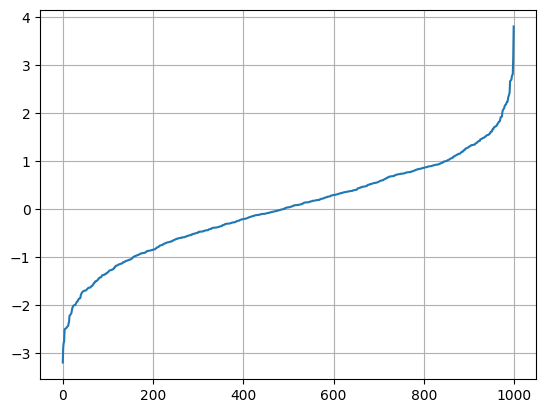

In [ ]:
ls0 = list(np.random.normal(0,1,1000))
ls0 = MergeSort(ls0)
ls0=np.array(ls0)
plt.plot(np.arange(1000),ls0)
plt.grid()

In [ ]:
np.all(ls0[:-1] <= ls0[1:])

True

##StabilityTest

In [ ]:
def Merge(ls0,ls1,index=0):
  # Time : O(n)
  # Space: O(n)
  sorted_ls = []
  i0 = 0
  i1 = 0
  while i0 < len(ls0) and i1 < len(ls1):
    if ls0[i0][index] <= ls1[i1][index]:
      sorted_ls.append(ls0[i0])
      i0 += 1
    else:
      sorted_ls.append(ls1[i1])
      i1 += 1
  if i0 < len(ls0):
    sorted_ls.extend(ls0[i0:])
  if i1 < len(ls1):
    sorted_ls.extend(ls1[i1:])
  return sorted_ls

def MergeSort(ls):
  # Time : O(n log(n))
  # Space: O(n)
  # https://youtu.be/3j0SWDX4AtU?si=W6QHfZytqCj1S_6X
  if len(ls) in [0,1]:
    return ls
  middle = math.floor(len(ls)/2)
  ls0 = MergeSort(ls[:middle])
  ls1 = MergeSort(ls[middle:])
  return Merge(ls0,ls1)

In [ ]:
# The code is implementing by ChatGPT.
def TestStabilityMergeSort():
    original_list = []
    ls0 = [7, 5, -6, 1, 5, 2,5,3] # [1,3,2,4,3,3,2,3,1,1]
    ls1 = [15, 207, 1, -12, 34, 14,7,34] # [1,1,2,4,2,3,2,4,1,1]
    for i0,i1 in zip(ls0,ls1):
      original_list.append((i0,i1))

    print("Original list:")
    print(original_list)

    sorted_list = MergeSort(original_list)

    print("Sorted list by Value A:")
    print(sorted_list)
TestStabilityMergeSort()

Original list:
[(7, 15), (5, 207), (-6, 1), (1, -12), (5, 34), (2, 14), (5, 7), (3, 34)]
Sorted list by Value A:
[(-6, 1), (1, -12), (2, 14), (3, 34), (5, 207), (5, 34), (5, 7), (7, 15)]


##Proof

###Part 1 : Correctness of `Marge`

```
def Merge(ls0,ls1):
  # Time : O(n)
  # Space: O(n)
  sorted_ls = []
  i0 = 0
  i1 = 0  
  while i0 < len(ls0) and i1 < len(ls1):
    if ls0[i0] <= ls1[i1]:
      sorted_ls.append(ls0[i0])
      i0 += 1
    else:
      sorted_ls.append(ls1[i1])
      i1 += 1
  if i0 < len(ls0):
    sorted_ls.extend(ls0[i0:])
  if i1 < len(ls1):
    sorted_ls.extend(ls1[i1:])
  return sorted_ls
```

Note that
* `ls0 = [a0, ..., an]` where `ls0` is sorted list input.
* `ls1 = [b0, ..., bm]` where `ls1` is sorted list input.
* Index error never happen in this code because `while i0 < len(ls0) and i1 < len(ls1)` .

Given that

```
if ls0[i0] < ls1[i1]:
  sorted_ls.append(ls0[i0])
  i0 += 1
else:
  sorted_ls.append(ls1[i1])
  i1 += 1
```

Implies that
1. `sorted_ls` append the number from `ls0` and `ls1` in ascending order
2. `i0 += 1` and `i1 += 1` guarantee that `sorted_ls` never append previous number of `ls0` and `ls1`
3. `i0 += 1`, `i1 += 1` and `while i0 < len(ls0) and i1 < len(ls1)` guarantee that while loop will be terminated
4. `i0 += 1`, `i1 += 1` and `while i0 < len(ls0) and i1 < len(ls1)` meaning that only one of this 2 statements is true
* 1. `i0 == len(ls0)`
* 2. `i1 == len(ls1)`
5. If `i0 += 1` in every loop and eventually `i0 == len(ls0)` $\implies$ `sorted_ls` append every numbers of `ls0`
6. If `i1 += 1` in every loop and eventually `i1 == len(ls1)` $\implies$ `sorted_ls` append every numbers of `ls1`

Given that

```
if i0 < len(ls0):
  sorted_ls.extend(ls0[i0:])
if i1 < len(ls1):
  sorted_ls.extend(ls1[i1:])
```

Implies that
1. `i0 < len(ls0)` $\implies$ `sorted_ls` never append `ls0[i0:]` in while loop and it append in this statement.
2. `i1 < len(ls1)` $\implies$ `sorted_ls` never append `ls1[i1:]` in while loop and it append in this statement.

Therefore this code work correctly.

Both time and space complexity of this algorithm is $O(n)$ because
1. `len(sorted_ls) == len(ls0) + len(ls1)` which use $O(n)$ space
2. While loop takes at least `len(ls0)` or `len(ls1)` loops, and at most `len(ls0) + len(ls1) - 1` loops.
3. The average time and space complexity of `extend` command is $O(n)$







###Part 2 : Correctness of `MergeSort`

```
def MergeSort(ls):
  # Time : O(n log(n))
  # Space: O(n)
  # https://youtu.be/3j0SWDX4AtU?si=W6QHfZytqCj1S_6X
  if len(ls) in [0,1]:
    return ls
  middle = math.floor(len(ls)/2)
  ls0 = MergeSort(ls[:middle])
  ls1 = MergeSort(ls[middle:])
  return Merge(ls0,ls1)
```

Given that the Base case is
* If `len(ls) in [0,1]` $\implies$ `ls` is already sorted list.

Suppose that
* `ls = [a0, ..., an]`
* `middle = math.floor(len(ls)/2)`

Then
1. `ls[:middle] = [a0, ..., am]` where `m == middle - 1`
1. `ls[middle:] = [aM, ..., an]` where `M == middle`

Given that

```
ls0 = MergeSort(ls[:middle])
ls1 = MergeSort(ls[middle:])
```

Implies that
1. It takes both $\log(n)$ time and recursive stack space to recursively separate `ls` to multiple smaller lists such that their length are equal to $0$ or $1$
2. When the length of the separated list is equal to $0$ or $1$, it will automatically sorted due to the based case.

The algorithm `Merge(ls0,ls1)` is proved that it always create sorted list `sorted_ls` in $O(n)$ time and space, if both `ls0` and `ls1` are sorted lists, Implies that
1. If `len(ls0)`, `len(ls1)` $\in\{0,1\}\implies$ `sorted_ls` is sorted list.
2. `ls0 = MergeSort(ls[:middle])` and `ls1 = MergeSort(ls[middle:])` are both sorted list $\implies$ `sorted_ls` is sorted list.
3. After `ls0 = MergeSort(ls[:middle])` is executed, `ls1 = MergeSort(ls[middle:])` is executed such that `ls1` is sorted list and contain number from opposite side of `ls0`.

Therefore this algorithm sort list correctly with
1. Time: $O(n\log(n))$
* Loop $=n$
* Recursive Loop $=\log(n)$
2. Space: $O(n)$
* $O(n)=O(n)+O(\log(n))$
* Recursive Stack Space $=\log(n)$

###Part 3 : `MergeSort` is Stable

This `Merge` is stable because
1. Everytime that `i0 += 1`, then `sorted_ls.append(ls0)` without changing the original order of subsequence in `ls0`
1. Similary, everytime that `i1 += 1`, then `sorted_ls.append(ls1)` without changing the original order of subsequence in `ls1`
3. When `ls0[i0] == ls1[i1]`, because the sequence `ls0` always be the previous sequence before `ls1` then `sorted_ls.append(ls0[i0])` first.

Given that the function `MergeSort` separate the list `ls` in to half in each recursive loop. When `len(ls) == [n0, n1]` the original order of the elements in `ls` is preserved if both `n0 <= n1`.

Because `Merge` is stable and the `MergeSort([a])` and `MergeSort([a,b])` is stable, implies that `MergeSort(ls)` is also stable in every case.

#QuickSort

##Implementation

In [ ]:
def Pivot(ls, low, high):
  # Time : O(n)
  # Space: O(1)
  prev = low - 1
  next = low
  while next < high:
    if ls[next] < ls[high]:
      prev += 1
      temp = ls[next]
      ls[next] = ls[prev]
      ls[prev] = temp
    next += 1
  if prev == low - 1:
    prev += 1
  while prev < high and ls[prev] <= ls[high]:
    prev += 1
  if prev < high:
    temp = ls[next]
    ls[next] = ls[prev]
    ls[prev] = temp
  return prev

def Random(ls, low, high):
  index = np.random.randint(low,high,1)[0]
  temp = ls[high]
  ls[high] = ls[index]
  ls[index] = temp

def QuickSort(ls, low=0, high=None, is_rand = True):
  # Time : O(n log(n))
  # Space: O(log(n))
  # https://www.geeksforgeeks.org/quick-sort-algorithm/
  if high == None:
    high = len(ls) - 1
  if low < high:
    if is_rand == True:
      Random(ls, low, high)
    pivot = Pivot(ls, low, high)
    QuickSort(ls, low, pivot - 1, is_rand)
    QuickSort(ls, pivot + 1, high, is_rand)

##Test

In [ ]:
ls = [3,3,3,3,3,3,2,5,8,8,8,8,8,8,9]
QuickSort(ls,is_rand=False)
print(ls)

[2, 3, 3, 3, 3, 3, 3, 5, 8, 8, 8, 8, 8, 8, 9]


In [ ]:
ls = list((10*np.random.normal(0,1,6)).astype(np.int64))
print(ls,'\n')
QuickSort(ls)
print(ls)

[-16, 10, 18, -7, 7, -8] 

[-16, -8, -7, 7, 10, 18]


In [ ]:
ls

[-16, -8, -7, 7, 10, 18]

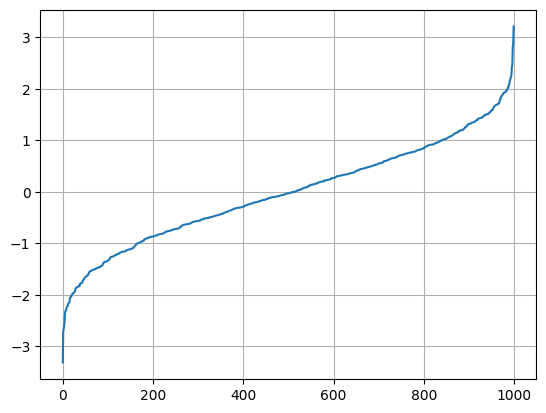

In [ ]:
ls0 = list(np.random.normal(0,1,1000))
QuickSort(ls0)
ls0=np.array(ls0)
plt.plot(np.arange(1000),ls0)
plt.grid()

In [ ]:
np.all(ls0[:-1] <= ls0[1:])

True

##Check Stability

In [ ]:
def Pivot(ls, low, high, index=0):
  # Time : O(n)
  # Space: O(1)
  prev = low - 1
  next = low
  while next < high:
    if ls[next][index] < ls[high][index]:
      prev += 1
      temp = ls[next]
      ls[next] = ls[prev]
      ls[prev] = temp
    next += 1
  if prev == low - 1:
    prev += 1
  while prev < high and ls[prev][index] <= ls[high][index]:
    prev += 1
  if prev < high:
    temp = ls[next]
    ls[next] = ls[prev]
    ls[prev] = temp
  return prev

def QuickSort(ls, low=0, high=None, index=0):
  # Time : O(n log(n))
  # Space: O(1)
  # https://www.geeksforgeeks.org/quick-sort-algorithm/
  if high == None:
    high = len(ls) - 1
  if low < high:
    pivot = Pivot(ls, low, high, index)
    QuickSort(ls, low, pivot - 1, index)
    QuickSort(ls, pivot + 1, high, index)

In [ ]:
# The code is implementing by ChatGPT.
def TestStability(sorting_algorithm):
    original_list = []
    ls0 = [7    ,  7,    5, -6,   1,  5,   5,  2, 5,  3] # [1,3,2,4,3,3,2,3,1,1]
    ls1 = [2.718, 15, 2.14,  1, -12, 34, 404, 14, 7, 34] # [1,1,2,4,2,3,2,4,1,1]
    for i0,i1 in zip(ls0,ls1):
      original_list.append((i0,i1))

    sorted_list = original_list.copy()
    sorting_algorithm(sorted_list)

    print("Original list:")
    print(original_list)
    print("Sorted list by Value A:")
    print(sorted_list)


In [ ]:
TestStability(QuickSort)

Original list:
[(7, 2.718), (7, 15), (5, 2.14), (-6, 1), (1, -12), (5, 34), (5, 404), (2, 14), (5, 7), (3, 34)]
Sorted list by Value A:
[(-6, 1), (1, -12), (2, 14), (3, 34), (5, 34), (5, 404), (5, 2.14), (5, 7), (7, 15), (7, 2.718)]


##Proof Part 1 A : Correctness of `Pivot` Summary

```
def Pivot(ls, low, high):
  # Time : O(n)
  # Space: O(1)
  prev = low - 1
  next = low
  while next < high:
    if ls[next] < ls[high]:
      prev += 1
      temp = ls[next]
      ls[next] = ls[prev]
      ls[prev] = temp
    next += 1
  if prev == low - 1:
    prev += 1
  while prev < high and ls[prev] <= ls[high]:
    prev += 1
  if prev < high:
    temp = ls[next]
    ls[next] = ls[prev]
    ls[prev] = temp
  return prev
```

The purpose of this algorithm is to sort list `ls` partially such that
* `forall i < pivot :ls[i] <= ls[pivot]`
* `forall i > pivot : ls[i] > ls[pivot]`

The for loop starts by initializing
* `next = low`
* `prev = low - 1`

`prev <= next` is always `True` because
* `prev < next` in the initialization process
* There is no ways that `prev += 1` such that `prev > next`

`if ls[next] < ls[high] : prev += 1 ...` such that
* `ls[prev] >= ls[high]` or `prev == next`
* `ls[next] < ls[high]`  $\implies$ `prev == next` and `ls[prev] >= ls[high]` is impossible

Case No. 1 `prev == next` implies that
* `forall i <= next : ls[i] < ls[high]`
* `ls` is not updated.

Case No. 2 `ls[prev] >= ls[high]` implies that
* `exists prev < next : ls[next] < ls[high] <= ls[prev]`
* the positions of `ls[next]` and `ls[prev]` are swapped
* `ls[prev] < ls[high] <= ls[next]`

After the while loop is executed, `forall i <= prev : ls[i] <= ls[high]` because
1. `prev == next - 1` $\implies$ `while prev < high and ls[prev] <= ls[high] : prev += 1` is executed, such that `prev == high` and `return prev`
* `forall i < prev == high :ls[i] <= ls[prev == high]`
2. `prev < next - 1` $\implies$ `while prev < high and ls[prev] <= ls[high] : prev += 1` is executed, such that `ls[prev] >= ls[high]`, `prev == high` and the positions of `ls[prev]` and `ls[high]` are swapped in ascending order in case `ls[prev] > ls[high]`.
* `forall i < prev :ls[i] <= ls[prev]`
* `forall i > prev : ls[i] > ls[prev]`

Therefore this algorithm works correctly.

Because both `next` and `prev` is only increase in each loop, it is assumed that the maximum total loop is `2 * len(ls) - 1`, therefore the time and space that is required for execution are $O(n)$ and $O(1)$ respectively.

##Proof Part 1 B : Correctness of `Pivot` with more detail







###Definition

```
def Pivot(ls, low, high):
  # Time : O(n)
  # Space: O(1)
  prev = low - 1
  next = low
  while next < high:
    if ls[next] < ls[high]:
      prev += 1
      temp = ls[next]
      ls[next] = ls[prev]
      ls[prev] = temp
    next += 1
  if prev == low - 1:
    prev += 1
  while prev < high and ls[prev] <= ls[high]:
    prev += 1
  if prev < high:
    temp = ls[next]
    ls[next] = ls[prev]
    ls[prev] = temp
  return prev
```

Define
* `ls` is or is not sorted list
* `prev = low - 1`
* `next = low`

`prev < next` for every start of the while loop because
* `prev` is initialized such that `prev == next - 1`
* The maximum times that both `if ls[next] < ls[high]: prev += 1 ...` and `next += 1` are executed is equal to `high - low`

Note that in each loop, the `Pivot` does not update `ls[i]` forall `i < prev`

The purpose of this code is to update `prev` and `ls` such that
* `forall i in [low, ..., prev - 1] : ls[i] <= ls[prev]`
* `forall i in [prev, ..., high] : ls[prev] <= ls[i]`


###Evaluation

Note that
1. The time complexity of the while loop is $O(n)$ where $n=$ `high - low`
2. The time complexity of the second while loop is $O(n)$ where the maximum possible value of $n$ is `high - low`
3. The total space complexity of the while loop is $O(1)$

Therefore the complexity of `Pivot` is
* Time: $O(n)$
* Space: $O(1)$

###While Loop Initialization

When the while loop is initialized (`next == low`) and `if ls[next] < ls[high]`
1. `prev += 1`
2. `prev == low == next`
3. `ls` is not updated
4. Implies that the position of `ls[next]` and `ls[high]` is place in ascending order, such that `next < high and ls[next] < ls[high]`
5. `next += 1`

When the while loop is initialized (`next == low`) and `if ls[next] >= ls[high]`
1. The loop skips `ls[next]` in order to search `ls[i]` where `ls[i] < ls[high]`
2. `next += 1`

###First While Loop

After that if `next == low + 1` and `if ls[next] < ls[high]`
1. Case 1: `if prev == low` then
 1. `prev += 1`
 1. `prev == low == next`
 1. `ls` is not updated.
2. Case 2: `if prev == low - 1` then
 1. `prev += 1`
 1. `ls[next == low + 1] < ls[high] <= ls[prev == low]`
 1. the positions of `ls[prev]` and `ls[next]` are swapped in ascending order.
 1. `ls[prev == low] < ls[high]`
 1. `ls[high] <= ls[next]`

After that if `next == low + 1` and `if ls[next] >= ls[high]`
* `ls` is not updated
* The while loop skips `ls[next]` in order to search `ls[i]` where `ls[i] < ls[high]`
* `next += 1`


###`prev == next - 1` Part A

Conjecture
* `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]` $\implies$ `forall next in [low, ..., mid] : prev == next - 1`

Suppose that
* `low <= mid < high`
* `forall i in [low, ..., mid] : if ls[i] < ls[high]`

When the while loop is initialized (`next == low`) and `if ls[next] < ls[high]`
1. `prev += 1`
2. `prev == low == next`
3. `ls` is not updated
4. Implies that the position of `ls[next]` and `ls[high]` is place in ascending order, such that `next < high and ls[next] < ls[high]`
5. `next += 1`

After that if `next == low + 1` and `if ls[next] < ls[high]` then
* `prev == low == next - 1`
* `prev += 1`
* `prev == low + 1 == next`
* `ls` is not updated.

Suppose that `if ls[next] < ls[high]` then
* `prev == next - 1`
* `prev += 1`
* `prev == next`
* `ls` is not updated.

Then in the next loop, where `next is next + 1` and `if ls[next + 1] < ls[high]` then
* `prev == next`
* `prev += 1`
* `prev == next + 1`
* `ls` is not updated.

Therefore this conjecture is `True`
* `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]` $\implies$ `forall next in [low, ..., mid] : prev == next - 1`





###`prev == next - 1` Part B

Conjecture
* `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]` $\iff$ `forall next in [low, ..., mid] : prev == next - 1`

####Part 1

Suppose that
* $\{$ `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]` $\iff$ `forall next in [low, ..., mid] : prev == next - 1` $\}$ is `False`

Define
* $p=$ `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]`
* $q=$ `forall next in [low, ..., mid] : prev == next - 1`

Calculate
* $\sim(p\iff q)=\,\sim[(p\implies q)\land(q\implies p)]$
* $\sim(p\iff q)=\,\sim(p\implies q)\,\lor\sim(q\implies p)$
* $\sim(p\iff q)=(p\,\land\sim q)\lor(q\,\land\sim p)$

Then
* $\sim p=$ `exists mid < high : exists i in [low, ..., mid] : ls[i] >= ls[high]`
* $\sim q=$ `exists next in [low, ..., mid] : prev != next - 1`

Suppose that
* $(p\,\land\sim q)\lor(q\,\land\sim p)$ is `True`

Reference
* https://math.stackexchange.com/questions/10435/negation-of-if-and-only-if

####Part 2

Conjecture
* $(p\,\land\sim q)$ is `False`

Suppose that
* $(p\,\land\sim q)$ is `True`
* `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]` and `exists next in [low, ..., mid] : prev != next - 1`

Given that
* `prev < next` for every start of the while loop and `prev != next - 1` $\implies$ `prev < next - 1`

According to this theorem
* `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]` $\implies$ `forall next in [low, ..., mid] : prev == next - 1`

Implies that
* `prev == next - 1` and `prev < next - 1`

Therefore
* $\{$ `forall mid < high : forall i in [low, ..., mid] : if ls[i] < ls[mid]` and `exists next in [low, ..., mid] : prev != next - 1` $\}$ is `False`
* $(p\,\land\sim q)$ is `False`

####Part 3

Conjecture
* $(q\,\land\sim p)$ is `False`

Suppose that
* $(q\,\land\sim p)$ is `True`
* `forall next in [low, ..., mid] : prev == next - 1` and `exists mid < high : exists i in [low, ..., mid] : if ls[i] >= ls[high]`


Given that
* `exists mid < high : exists i in [low, ..., mid] : if ls[i] >= ls[high]` $\implies$ `if ls[next] < ls[high] : p += 1 ...` is not executed $\implies$ `prev < next - 1`
* `forall next in [low, ..., mid] : prev == next - 1`

Implies that
* `prev < next - 1` and `prev == next - 1`

Therefore
* `forall next in [low, ..., mid] : prev == next - 1` and `exists mid < high : exists i in [low, ..., mid] : if ls[i] >= ls[mid]` is `False`
* $(q\,\land\sim p)$ is `False`

####Conclusion

Given that
* $\sim(p\iff q)=(p\,\land\sim q)\lor(q\,\land\sim p)$ is `False`
* $(p\iff q)$ is `True`

Therefore
* `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]` $\iff$ `forall next in [low, ..., mid] : prev == next - 1`





###i - th While Loop

####Case A: `if prev == next - 1`

According to this theorem
* `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]` $\iff$ `forall next in [low, ..., mid] : prev == next - 1`

Implies that
1. Case A 1 : `if ls[next] < ls[high]`
 1. `forall i in [low, ..., next] : ls[i] < ls[high]`
 2. `ls` is not updated
 3. `next += 1`
2. Case A 2 : `if ls[next] >= ls[high]`
 1. `forall i in [low, ..., prev] : ls[i] < ls[high]`
 2. `mid = prev + 1 == next`
 2. `ls[prev] < ls[high] <= ls[next]`
 3. `if ls[next + i < high] < ls[high]` and `ls[next] >= ls[high]` $\implies$ the positions of `ls[next + i]` and `ls[next == prev + 1]` are swapped such that `ls[next] < ls[next + i]`
 4. `mid = next`
 4. `prev += 1` and `next += i` $\implies$ `mid < next`

####Case B: `if prev < next - 1`

Implies that
* `forall mid < high : exists i in [low, ..., mid] : ls[i] >= ls[high]` $\iff$ `exists next in [low, ..., mid] : prev < next - 1`

Then
1. Case B 1 : `if ls[next] < ls[high]`
* Case A 2 is applied, such that
* `ls[prev + 1] >= ls[high]`
* The positions of `ls[prev + 1]` and `ls[next]` are swapped.
* `ls[prev + 1 <= next - 1] < ls[next]`
* `prev += 1` and `next += i`
2. Case B 2 : `if ls[next] >= ls[high]`
* The while loop is skips `ls[next]`
* `next += 1`


###Last While Loop

####Case A

* `next == high`
* `prev == next - 1 == high - 1`

According to this theorem
* `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]` $\iff$ `forall next in [low, ..., mid] : prev == next - 1`

Implies that
* `forall i in [low, ..., high - 1] : ls[i] < ls[high]`
* `while prev < high and ls[prev] <= ls[high] : prev += 1` $\implies$ `prev == high`
* `if prev < high : ...` is not activated, such that `ls` is not updated

The purpose of this algorithm is
* `forall i in [low, ..., prev - 1] : ls[i] <= ls[prev]`
* `forall i in [prev, ..., high] : ls[prev] <= ls[i]`

Therefore this algorithm works correctly
* `forall i in [low, ..., high - 1] : ls[i] <= ls[high]`
* `forall i in [high, ..., high] : ls[high] <= ls[i]`

####Case B

* `next == high`
* `prev == low - 1` $\implies$ `ls[next] < ls[high] : ` is not executed in every while loop

Implies that
* `forall i in [low, ..., high - 1] : ls[i] >= ls[high]`

Then
1. Case No. 1
* `forall i in [low, ..., high - 1] : ls[i] == ls[high]` $\implies$ `prev == high` $\implies$ `if prev < high : ...` is not activated, such that `ls` is not updated, then `return high`
* `forall i in [low, ..., high - 1] : ls[i] == ls[high]` indicate that the algorithm works correctly.
2. Case No. 2
* `forall i in [low, ..., high - 1] : ls[i] > ls[high]` $\implies$ `if prev == low - 1 : prev += 1` is activated $\implies$ `if prev < high : ...` is activated, such that the positions of `ls[low]` and `ls[high]` are swapped in ascending order
* `ls[high] < ls[low] and low < high` then `return low`
* `forall i in [low + 1, ..., high - 1] : ls[low] < ls[i]` indicate that the algorithm works correctly.
3. Case No. 3
* `forall i in [low, ..., pivot - 1] : ls[i] == ls[high]`
* `ls[pivot] > ls[high] and pivot < high`
* Implies that `while prev < high and ls[prev] <= ls[high] : prev += 1` is activated, such that `prev == pivot`
* `prev < high : ` The positions of `ls[prev]` and `ls[high]` are swapped in ascending order
* `ls[prev] < ls[high] and prev < high`
* `forall i in [low, ..., pivot - 1] : ls[i] == ls[high]` and `forall i in [low, ..., pivot] : ls[i] >= ls[high]` $\implies$ this algorithm is working correctly.

####Case C

* `next == high not in [low, ..., mid]`
* `prev == mid < next`

According to this theorem
* `forall mid < high : forall i in [low, ..., mid] : ls[i] < ls[high]` $\iff$ `forall next in [low, ..., mid] : prev == next - 1`

Note that
* `forall next in [low, ..., mid] : prev == next - 1` indicate that `prev == next - 1` in `i` th loop `forall i in [low, ..., mid]`

Implies that
* `forall i in [low, ..., mid] : ls[i] < ls[high]` indicate that this algorithm does not work incorrectly.

Given that
* `while next < high : if ls[next] >= ls[high] : next += 1` $\implies$ `forall i in [mid + 1, ..., high] : ls[i] >= ls[high]`

Then `while prev < high and ls[prev] <= ls[high] : prev += 1` is activated

`forall i in [mid + 1, ..., high] : ls[i] >= ls[high]` implies that
1. Case No. 1 : `forall i in [mid + 1, ..., high] : ls[i] == ls[high]`
* `prev == high`
* `return high`
2. Case No. 2 : `exists i in [mid + 1, ..., high] : ls[i] > ls[high]`
* `prev < high` and `ls[prev] > ls[high]`
* The positions of `ls[prev]` and `ls[high]` are swapped such that `ls[prev] < ls[high] and prev < high`
* `return prev`

The purpose of this algorithm is
* `forall i in [low, ..., prev - 1] : ls[i] <= ls[prev]`
* `forall i in [prev, ..., high] : ls[prev] <= ls[i]`

Therefore this algorithm works correctly
* `forall i in [low, ..., prev - 1] : ls[i] <= ls[prev]`
* `forall i in [prev, ..., high] : ls[prev] <= ls[i]`

##Part 2 : Correctness of `QuickSort`

###Correctness

```
def Random(ls, low, high):
  index = np.random.randint(low,high,1)[0]
  temp = ls[high]
  ls[high] = ls[index]
  ls[index] = temp

def QuickSort(ls, low = 0, high = None, is_rand = True):
  # Time : O(n log(n))
  # Space: O(log(n))
  # https://www.geeksforgeeks.org/quick-sort-algorithm/
  if high == None:
    high = len(ls) - 1
  if low < high:
    if is_rand == True:
      Random(ls, low, high)
    pivot = Pivot(ls, low, high)
    QuickSort(ls, low, pivot - 1, is_rand)
    QuickSort(ls, pivot + 1, high, is_rand)
```

The purpose of `QuickSort` is to sort the lists `ls`.

###Initialization

Recursive loop starts by defining
* `low = 0`
* `high = len(ls) - 1`

Then the `Pivot(ls, 0, len(ls) - 1)` return the `pivot` and modify `ls` such that
* `forall i > pivot : ls[pivot] <= ls[i]`
* `forall i <= pivot : ls[i] <= ls[pivot]`
* `ls[pivot] is placed correctly`
* `low <= pivot <= high` for every recursive loop

###Base Case

`QuickSort(ls, p, p)` $\implies$ `QuickSort(ls)` is not executed.

`QuickSort(ls, p, p + 1)` implies that
1. `pivot == p`
* `QuickSort(ls, p, p - 1)` is not executed
* `QuickSort(ls, p + 1, p + 1)` is not executed
2. `pivot == p + 1`
* `QuickSort(ls, p, p)` is not executed
* `QuickSort(ls, p + 2, p + 1)` is not executed

`QuickSort(ls, p, p + 2)` implies that
1. `pivot == p`
* `QuickSort(ls, p, p - 1)` is not executed
* `QuickSort(ls, p + 1, p + 2)` is executed as last recursive loop
2. `pivot == p + 1`
* `QuickSort(ls, p, p)` is not executed
* `QuickSort(ls, p + 2, p + 2)` is not executed
3. `pivot == p + 2`
* `QuickSort(ls, p, p + 1)` is executed as last recursive loop
* `QuickSort(ls, p + 3, p + 2)` is not executed

`QuickSort(ls, p, p + 3)` implies that
1. `pivot == p`
* `QuickSort(ls, p, p - 1)` is not executed
* `QuickSort(ls, p + 1, p + 3)` is executed as last recursive loop
2. `pivot == p + 1`
* `QuickSort(ls, p, p)` is not executed
* `QuickSort(ls, p + 2, p + 3)` is executed as last recursive loop
3. `pivot == p + 2`
* `QuickSort(ls, p, p + 1)` is executed as last recursive loop
* `QuickSort(ls, p + 3, p + 3)` is not executed
4. `pivot == p + 3`
* `QuickSort(ls, p, p + 2)` is executed
* `QuickSort(ls, p + 4, p + 3)` is not executed

`Pivot sorts ls correctly` $\implies$ `forall i in [0, 1, 2, 3] : QuickSort(ls, p, p + i) sorts ls correctly`

###General Case

Given that
* `QuickSort(ls, low, high)` never modify the position of `ls[i]` where `i not in [low, ..., high]`
* `forall pivot in Pivot(ls, low, high) : pivot in [low, ..., high]`
* `low` increase strictly, `low = pivot + 1`
* `high` decrease strictly, `high = pivot - 1`

Implies that
* The `stack` for recursive consume finite space.

Suppose that
* `QuickSort(ls, low, high)`

Consider 3 cases
1. `pivot in [0, 1, high - 1, high]` Implies that
* the different between `high` and `low` is decrease by 1
2. `pivot - low in [0, 1, 2, 3]` Implies that
* `QuickSort(ls, low, pivot) sorts ls correctly`
3. `high - pivot in [0, 1, 2, 3]` Implies that
* `QuickSort(ls, pivot, high) sorts ls correctly`
4. `high - pivot > 3` or `pivot - low > 3`
* The different between `high` and `low` is decrease by number greater than 1
* `QuickSort(ls, low, pivot - 1)` is executed multiple times, until `low == pivot - 1`, then `stack.pop()`
* Then `QuickSort(ls, pivot + 1, high)` is executed

Therefore `QuickSort` sorts `ls` correctly.

###Evaluation

If the different between `high` and `low` is decrease by approximately half, implies
* `next = low`
* `while next < high : ... next += 1`
* `while prev < high and ls[prev] <= ls[high]: prev += 1`
* `Pivot` is working with shorter loop in each child node.

The average complexity of `QuickSort` is
* Time : $O(n\log(n))$
* Space: $O(\log(n))$

If the different between `high` and `low` is decrease by 1 in almost every loop.
* `next = low`
* `while next < high : ... next += 1`
* `while prev < high and ls[prev] <= ls[high]: prev += 1`
* `Pivot` is working with 1 shorter loop in each child node.

Implies that, the worse complexity of `QuickSort` is
* Time : $O(n^2)$
* Space: $O(n)$

This might happended when applying the `QuickSort` with sorted and/or nearly sorted input array `ls` because `forall i in [low, ..., high] : ls[i] <= ls[high]`.

One solution to this issue is to use `Random` to swap position of `ls[rand]` and `ls[high]`, such that
* the `high` and `low` is decrease by approximately half.

However `Random` make the `QuickSort` less stable, because
* `Random` swaps the position of `ls[rand]` where `rand in [low, high]` (`rand` is random number) with `ls[high]`
* After `def Pivot() : ... while prev < high and ls[prev] <= ls[high]:` is executed, the position of `ls[high]` and `ls[i]`, where `ls[i] == ls[high]` might not be place in the original order.

The solution to solve the performance and stability issues of `QuickSort` is not in the scope of this documentation.


##Part 3 : `QuickSort` is not Stable


In [ ]:
def Pivot(ls, low, high, index=0):
  # Time : O(n)
  # Space: O(1)
  prev = low - 1
  next = low
  while next < high:
    if ls[next][index] < ls[high][index]:
      prev += 1
      temp = ls[next]
      ls[next] = ls[prev]
      ls[prev] = temp
    next += 1
  if prev == low - 1:
    prev += 1
  while prev < high and ls[prev][index] <= ls[high][index]:
    prev += 1
  if prev < high:
    temp = ls[next]
    ls[next] = ls[prev]
    ls[prev] = temp
  return prev

def QuickSort(ls, low=0, high=None, index=0):
  # Time : O(n log(n))
  # Space: O(1)
  # https://www.geeksforgeeks.org/quick-sort-algorithm/
  if high == None:
    high = len(ls) - 1
  if low < high:
    pivot = Pivot(ls, low, high, index)
    QuickSort(ls, low, pivot - 1, index)
    QuickSort(ls, pivot + 1, high, index)

In [ ]:
# The code is implementing by ChatGPT.
def TestStability(sorting_algorithm):
    original_list = []
    ls0 = [  1,  1,  1,  5,  5,  5,  4,  4,  3,  3,  4]
    ls1 = ['a','a','a','e','e','e','1','2','c','c','3']
    for i0,i1 in zip(ls0,ls1):
      original_list.append((i0,i1))

    sorted_list = original_list.copy()
    sorting_algorithm(sorted_list)

    print("Original list:")
    print(original_list)
    print("Sorted list by Value A:")
    print(sorted_list)


In [ ]:
TestStability(QuickSort)

Original list:
[(1, 'a'), (1, 'a'), (1, 'a'), (5, 'e'), (5, 'e'), (5, 'e'), (4, '1'), (4, '2'), (3, 'c'), (3, 'c'), (4, '3')]
Sorted list by Value A:
[(1, 'a'), (1, 'a'), (1, 'a'), (3, 'c'), (3, 'c'), (4, '3'), (4, '1'), (4, '2'), (5, 'e'), (5, 'e'), (5, 'e')]
